# Explore here

# ÍNDICE

1. [CARGA DE DATOS Y PRIMERAS IMPRESIONES](#1-carga-de-datos-y-primeras-impresiones)  
2. [LIMPIEZA Y TRATAMIENTO DE NULOS](#2-limpieza-y-tratamiento-de-nulos)  
3. [ANÁLISIS UNIVARIADO (UNIVARIANTE)](#3-análisis-univariado-univariante)  
   - [3.1: Categóricas](#31-categóricas)  
   - [3.2: Numéricas](#32-numéricas)  
4. [ANÁLISIS BIVARIADO O MULTIVARIANTE](#4-análisis-bivariado-o-multivariante)  
   - [4.1 Numérico-numérico](#41-numérico-numérico)  
   - [4.2 Categórico-categórico](#42-categórico-categórico)  
5. [ANÁLISIS DE CORRELACIONES](#5-análisis-de-correlaciones)  
6. [OUTLIERS (VALORES ATÍPICOS)](#6-outliers-valores-atípicos)  
7. [FEATURE ENGINEERING: "ESCALADO Y NORMALIZACIÓN DE VALORES"](#7-feature-engineering-escalado-y-normalización-de-valores)  
   - [7.1 Normalización](#71-normalización)  
   - [7.2 Escalado mín-max](#72-escalado-mín-max)
8. [MODELO DE ÁRBOL DE DECISIÓN](#8-modelo-de-arbol-de-decisión)


### 1. CARGA DE DATOS Y PRIMERAS IMPRESIONES ###

In [261]:
# Your code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

sns.set(
    style="whitegrid",     
    palette="pastel",              
)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1


Observamos que el actual dataset completo contiene 9 columnas:



- Pregnancies. Número de embarazos del paciente (numéricos)
- Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
- BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)
- SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
- Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
- BMI. Índice de masa corporal (numérico)
- DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)
- Age. Edad del paciente (numérico)
- Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)


In [262]:
total_data.shape

(768, 9)

Como se mencionaba anteriormente, de este dataset de 9 columnas, éste contiene 768 filas.

In [263]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Podemos verificar que todas las columnas del dataset son numéricas, 2 de ellas incuyendo decimales (float65).

### 2. LIMPIEZA Y TRATAMIENTO DE NULOS ###

In [264]:
total_data.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.17,63,0
764,2,122,70,27,0,36.8,0.34,27,0
765,5,121,72,23,112,26.2,0.24,30,0
766,1,126,60,0,0,30.1,0.35,47,1


Hemos decidido saltarnos el paso de eliminar columnas en el presente dataset ya que consideremos que para el "Outcome" (que es el target de ese proyecto de ML) que sería saber si alguien tiene o no diabetes, no hay ninguna que sobre. 

Por otro lado, hemos procedido a eliminar duplicados y observamos las mismas cantidades que el .shape original, por lo que podemos afirmar que no hay duplicados en el dataset.

In [265]:
total_data.shape

(768, 9)

### 3. ANÁLISIS UNIVARIADO (UNIVARIANTE)

3.1 CATEGÓRICAS:

Como expresado con anterioridad, este dataset no contiene valores categóricos.

3.2 NUMÉRICAS:

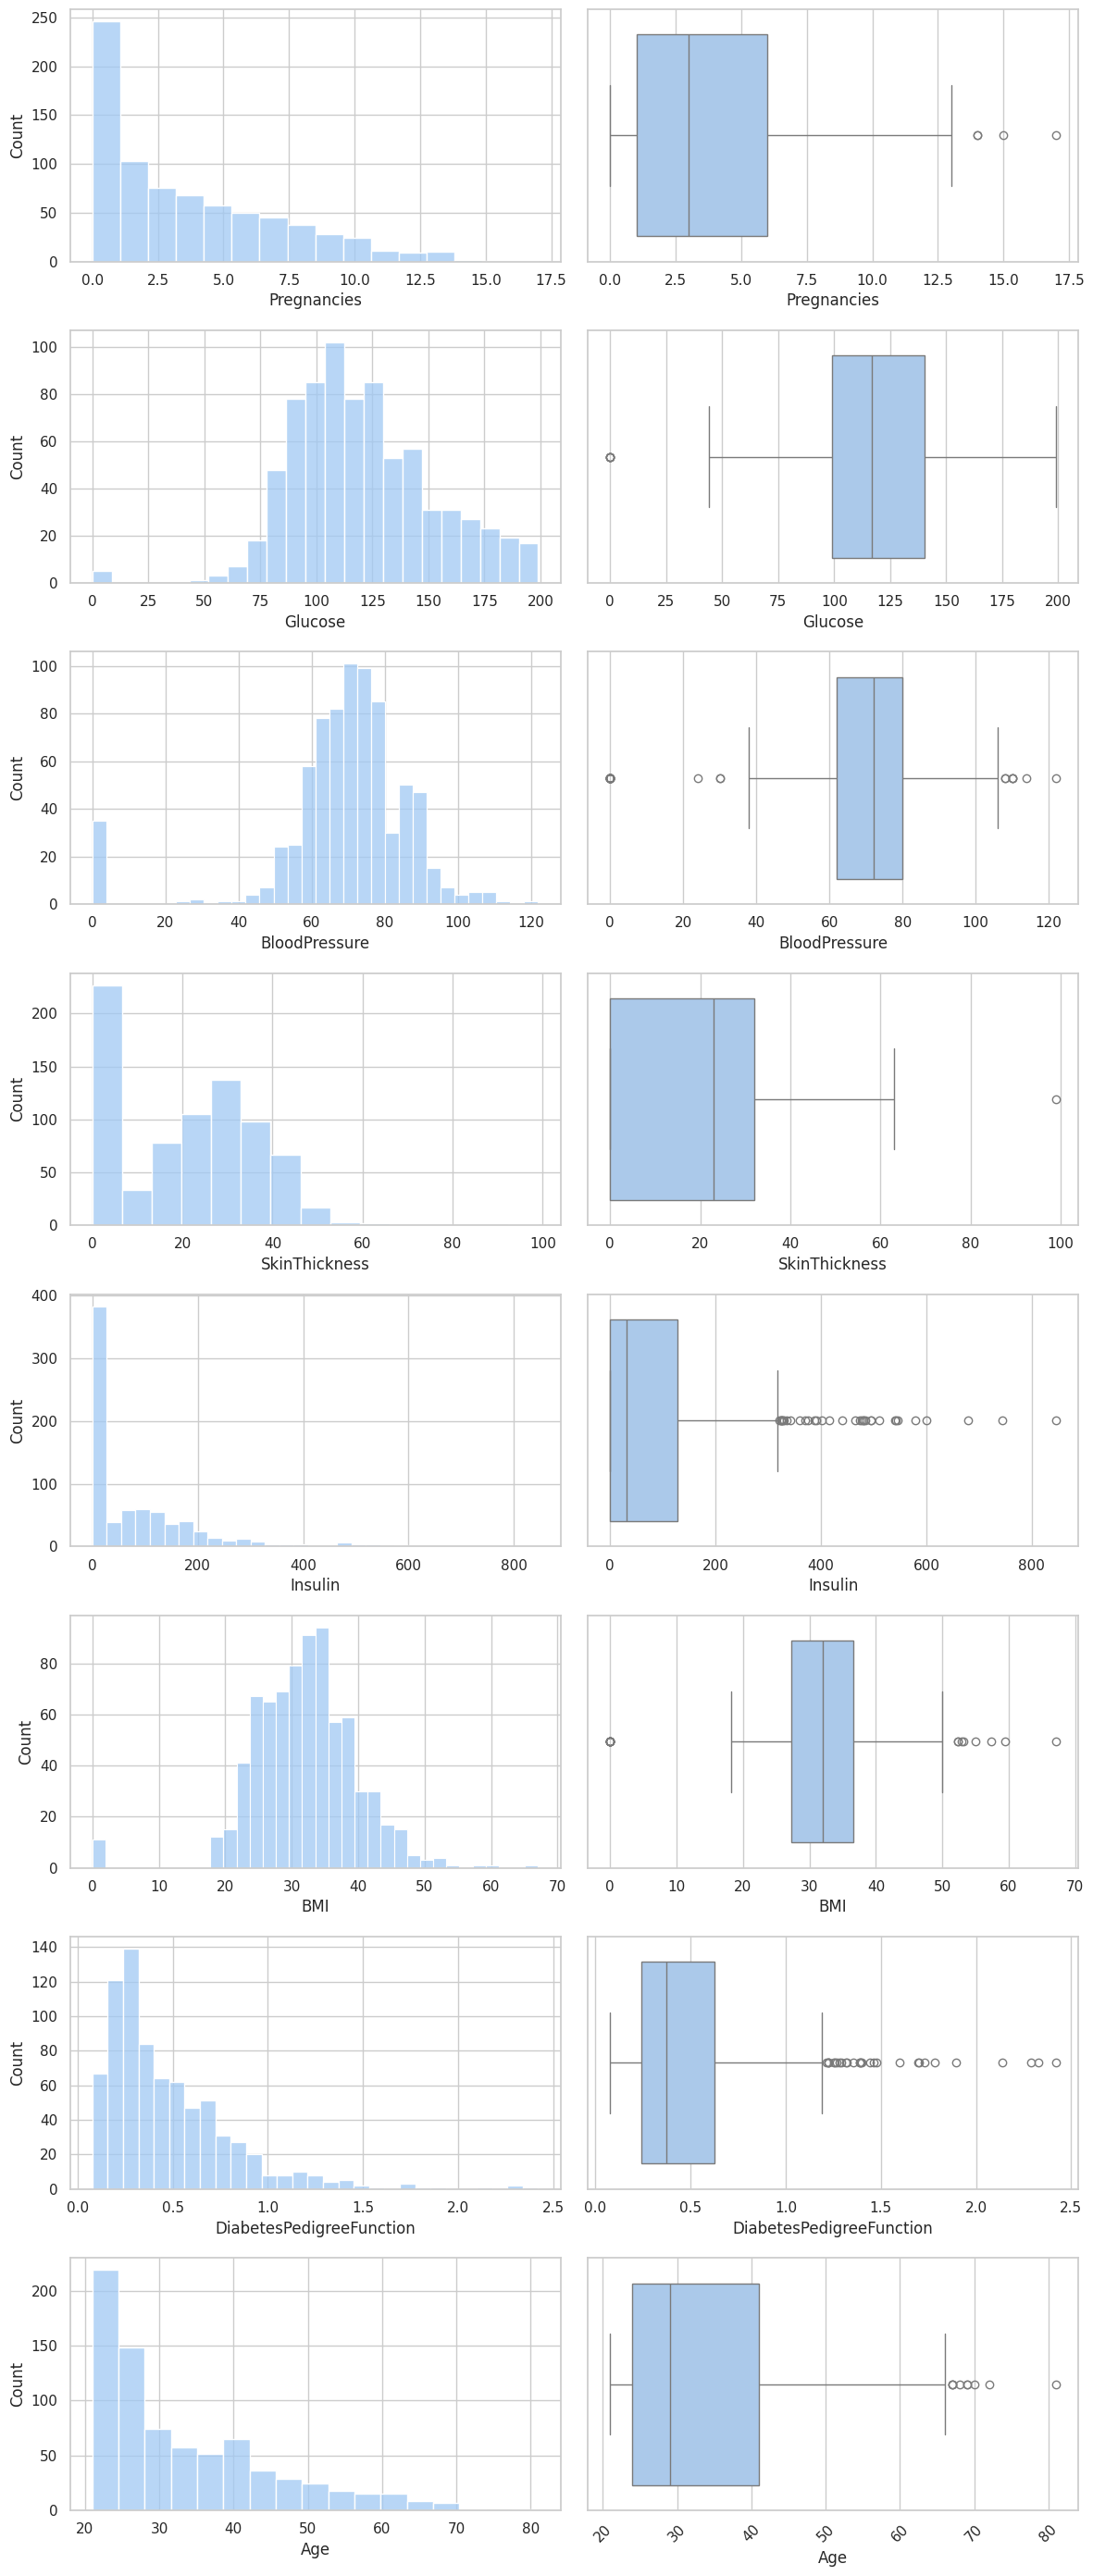

In [266]:
fig, axis = plt.subplots(8, 2, figsize=(12, 28))

sns.histplot(ax=axis[0, 0], data=total_data, x="Pregnancies")
sns.boxplot(ax=axis[0, 1], data=total_data, x="Pregnancies")

sns.histplot(ax=axis[1, 0], data=total_data, x="Glucose")
sns.boxplot(ax=axis[1, 1], data=total_data, x="Glucose")

sns.histplot(ax=axis[2, 0], data=total_data, x="BloodPressure")
sns.boxplot(ax=axis[2, 1], data=total_data, x="BloodPressure")

sns.histplot(ax=axis[3, 0], data=total_data, x="SkinThickness")
sns.boxplot(ax=axis[3, 1], data=total_data, x="SkinThickness")

sns.histplot(ax=axis[4, 0], data=total_data, x="Insulin")
sns.boxplot(ax=axis[4, 1], data=total_data, x="Insulin")

sns.histplot(ax=axis[5, 0], data=total_data, x="BMI")
sns.boxplot(ax=axis[5, 1], data=total_data, x="BMI")

sns.histplot(ax=axis[6, 0], data=total_data, x="DiabetesPedigreeFunction")
sns.boxplot(ax=axis[6, 1], data=total_data, x="DiabetesPedigreeFunction")

sns.histplot(ax=axis[7, 0], data=total_data, x="Age")
sns.boxplot(ax=axis[7, 1], data=total_data, x="Age")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Pasamos pues al análisis univariado, en este caso numérico de todas las columnas del dataset, con histogramas y diagramas de caja y bigotes:

- Pregnancies: Media de 3.74 unidades, siendo 0 mínimo de embarazos y 17 el máximo (claro outlier como se ve en el boxplot junto con otros casos de múltiples embarazos más allá de 6), el Q1 se encontraría en 1 embarazo.


- Glucose: Claro outlier en el valor 0. En cuanto al resto de datos que se pueden observar, la media se encontraría en 120.86. Así pues la caja se encontrarí entre los valores de 100.00 y 139.00, con bigote máximo en 199.00 pero sin outliers. 


- BloodPressure: En relación a la presión arterial, hay outliers tanto por debajo del bigote inferior como por encima del bigote superior. La media de esta variable estaría en 69.42, con un mínimo de 0 y máximo en 122.00, si bien los Q1 y Q3 encontrarían entre los valores de 64.00 y 80.00. 


- SkinThickness: En relación al grosor del pliege cutáneo del tríceps en mm, la media se encuentra en 20.40, con mínimos en 0.00 y máximos en 63.00. Pese a esto, el Q1 y Q3 se equilibran entre el 0.00 y 32.00. Observamos un outlier bastante superior al bigote máximo por lo que quizá sería un error o un caso muy puntual a analizar.


- Insulin: En relación a los valores de insulina analizados de los pacientes, si bien la media está en 81.44, la cifra mínima está en 0.00 y la máxima en 846.00, lo cual nos da lugar a expresar que, a partir de valores ligeramente por encima de los 300.00 (donde se encuentra el bigote superior), existen una gran cantidad de outliers a tener en cuenta. Así pues, la caja se encuentra entre los valores 0.00 en Q1 a 129.75 en Q3.


- BMI: La masa corporal a analizar nos muestra una media en 31.98, con una caja de entre 27.10 y 36.38 (Q1 y Q3) y una máxima de 67.10 y mínima en 0.00 (valor que es outlier y seguramente error de recopilación de los datos). También observamos como hay outliers por encima del valor del bigote superior, 50.00, a tener en cuenta como dato muy interesante, junto al de la insulina previo.


- DiabetesPedigreeFunction: Aquí valoraríamos la función de pedigree de diabetes. En este caso la media sería 0.47, con una mínima de 0.08 y máxima de 2.42, con un Q1 0.24 de y un Q3 de 0.61. Podemos comentar pues, que a partir del bigote superior situado sobre la cifra de 1.20, se encuentra una gran cantidad de outliers. 



- Age: En cuanto a la edad de los pacientes, mínima 21 años y máxima de 81. Aquí observamos un Q1 24 de y un Q3 de 40 años de edad de los pacientes. A partir de, aproximadamente, 60 años de edad que sería el bigote superior, encontramos gran cantidad de outliers. Por su contrario, no los hay menores al mínimo.



- Outcome: 0 sería que no tiene diabetes, 1 que sí, por lo tanto en la variable target de nuestro dataset.

### 4. ANÁLISIS BIVARIADO O MULTIVARIANTE 

4.1 NUMÉRICO-NUMÉRICO

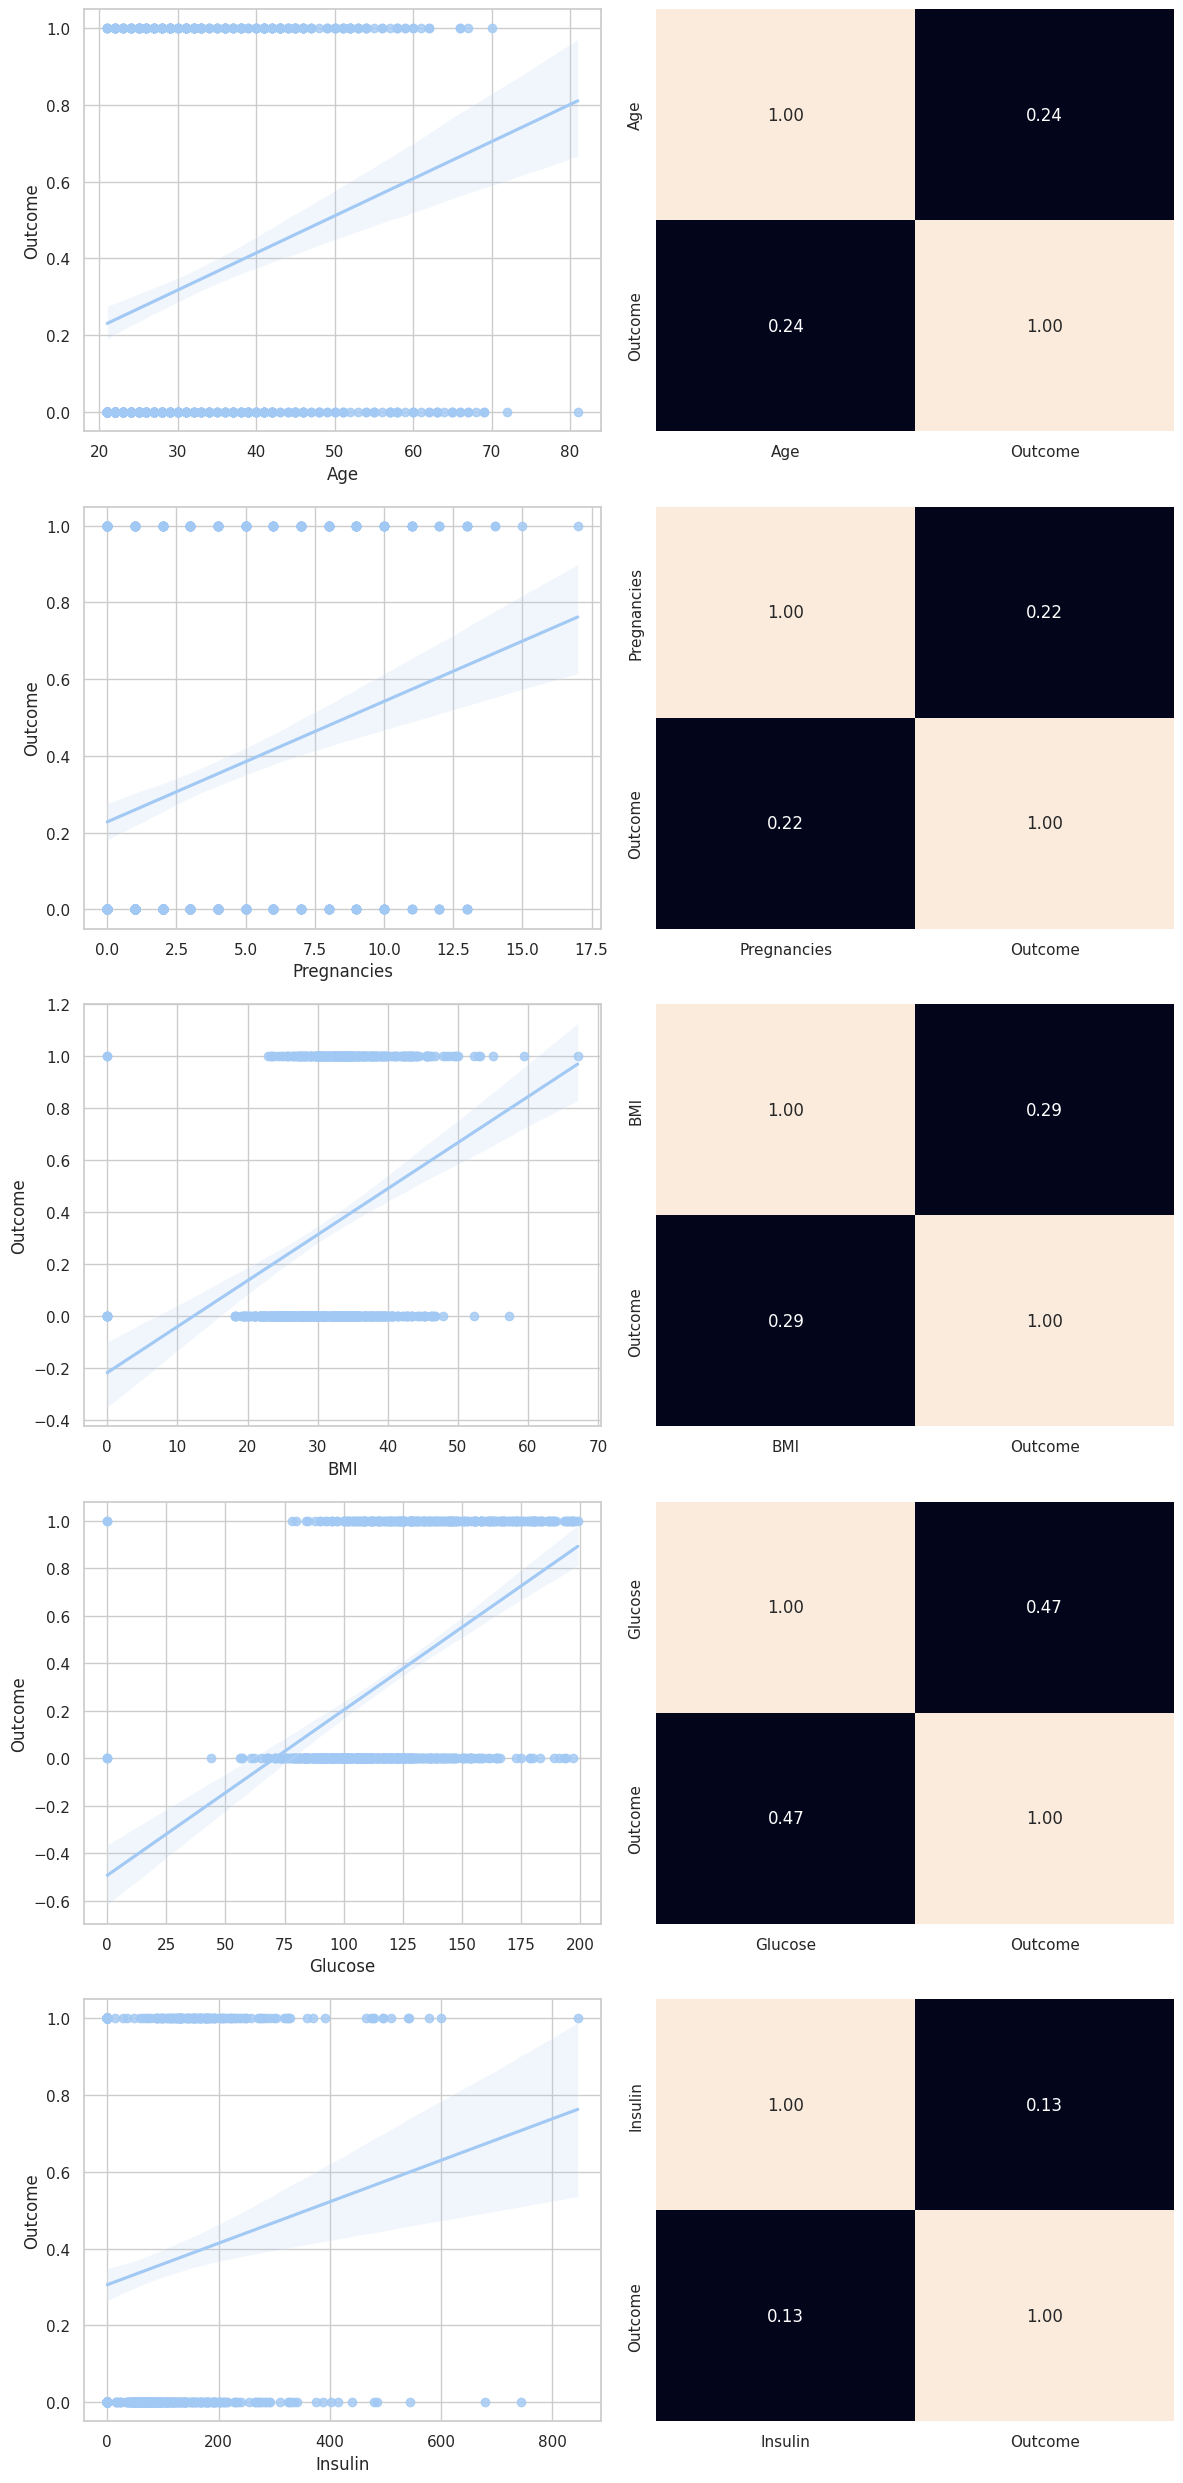

In [267]:
fig, axis = plt.subplots(5, 2, figsize=(12, 25))

sns.regplot(ax=axis[0, 0], data=total_data, x="Age", y="Outcome")
sns.heatmap(total_data[["Age", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[0, 1], cbar=False)

sns.regplot(ax=axis[1, 0], data=total_data, x="Pregnancies", y="Outcome")
sns.heatmap(total_data[["Pregnancies", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

sns.regplot(ax=axis[2, 0], data=total_data, x="BMI", y="Outcome")
sns.heatmap(total_data[["BMI", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[2, 1], cbar=False)

sns.regplot(ax=axis[3, 0], data=total_data, x="Glucose", y="Outcome")
sns.heatmap(total_data[["Glucose", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)

sns.regplot(ax=axis[4, 0], data=total_data, x="Insulin", y="Outcome")
sns.heatmap(total_data[["Insulin", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[4, 1], cbar=False)

plt.tight_layout()
plt.show()


En el presente caso, para analizar correlaciones de varias variables (2) por cada gráfico, en total 5, se han creado mapa de calor de correlaciones y gráficos de dispersión con líneas de regresión. De este modo pues:

- Age con Outcome: 0.24 de correlación entre las variables. 

- Pregnancies con Outcome: 0.22 de correlación entre las variables. 

- BMI con Outcome:0.29 de correlación entre las variables. 

- Glucose con Outcome:0.47 de correlación entre las variables. 

- Insulin con Outome: 0.13 de correlación entre las variables. 

Como los 5 son muy parecidos, podemos exponer pues que las línas de regresión en todos son bastante positivas, sería en las nubes de puntos donde se encontrarían las diferencias, más dispersas en algunos casos (outliers posibles en BMI, pregnancies, age, como se ha expresado en el punto anterior).

Es claro pues que, de estos 5 gráficos, la variable con más correlación con la variable target sería los niveles de glucosa. Pese a esto, posteriormente analizaremos todas las variables en un mapa de correlación completo donde podremos ver mejor si hay otras con más correlaciones entre sí una vez analizadas todas contra todas, este es un mero primer enfoque visual de contraposición de variables.

4.2 CATEGÓRICO-CATEGÓRICO

Como en el caso anterior, no hay variables categóricas por lo que no se puede llevar a cabo este análisis.

4.3 Combinaciones de la clase con varias predictoras

In [268]:
top_10_charges = total_data['BMI'].value_counts().nlargest(10).index
filtered_data = total_data[total_data['BMI'].isin(top_10_charges)]

Para visualizar mejor este caso, hemos decidido filtrar por los 10 valores más altos en cuanto a BMI se refiere.

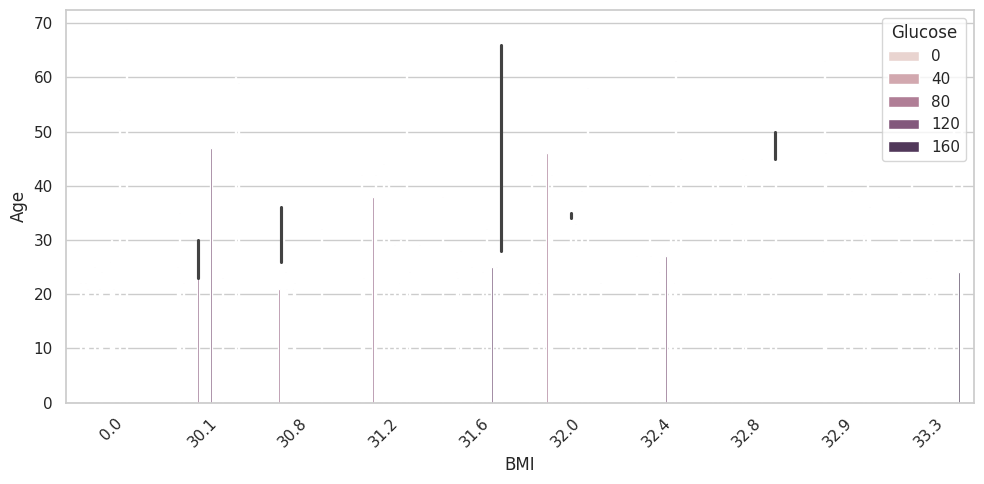

In [269]:

fig, axis = plt.subplots(figsize = (10, 5), ncols = 1)


sns.barplot(data = filtered_data, x = "BMI", y = "Age", hue = "Glucose")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Si bien hemos creado este barplot para completar el EDA, en este proyecto al ser tan numerosos los valores no sabríamos cuáles unir para tener algo que observar más claro.

### 5. ANÁLISIS DE CORRELACIONES

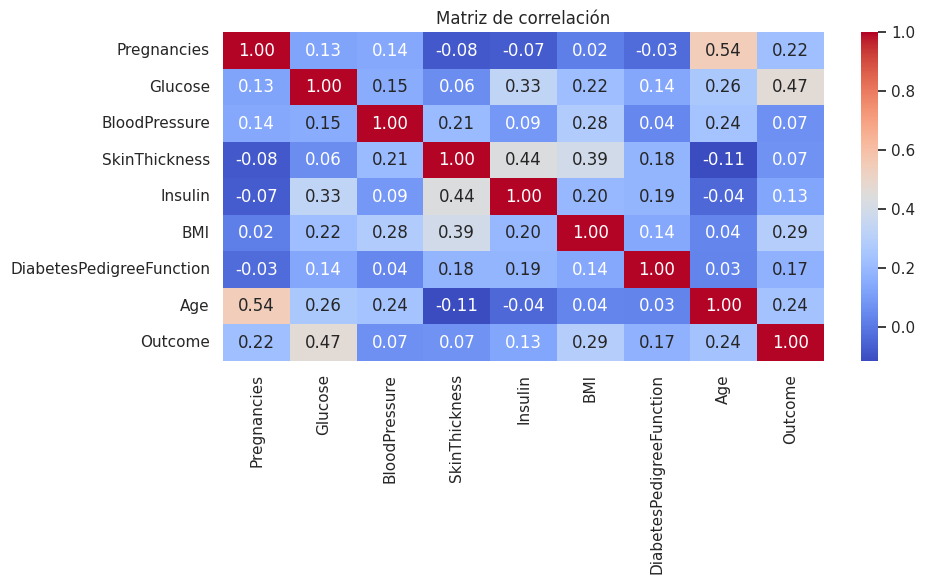

In [270]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Matriz de correlación")
plt.xticks()
plt.tight_layout()

plt.show()

Como hemos mencionado unos pasos atrás, aquí tenemos un mapa de correlaciones en un heatmap donde podemos observar con claridad las correlaciones entre variables, así pues, mencionamos las más visibles para tenerlas en cuenta posteriormente:

- 0.54: Pregnancies y Age
- 0.47: Glucose y Outcome -> Visto en gráfico anteriormente y mencionada ya dicha correlación a tener muy en cuenta.
- 0.44: Insulin y SkinThickness
- 0.39: SkinThickness y BMI
- -0.11: SkinThickness y Age: lógico a priori por simple paso del tiempo, cuestión por edad y no por diabetes.

En relación al caso que nos encontramos, las más relevantes a simple vista serían los niveles de glucosa, insulina y el grosor del pliegue cutáneo del tríceps para valorar junto al target, outcome.

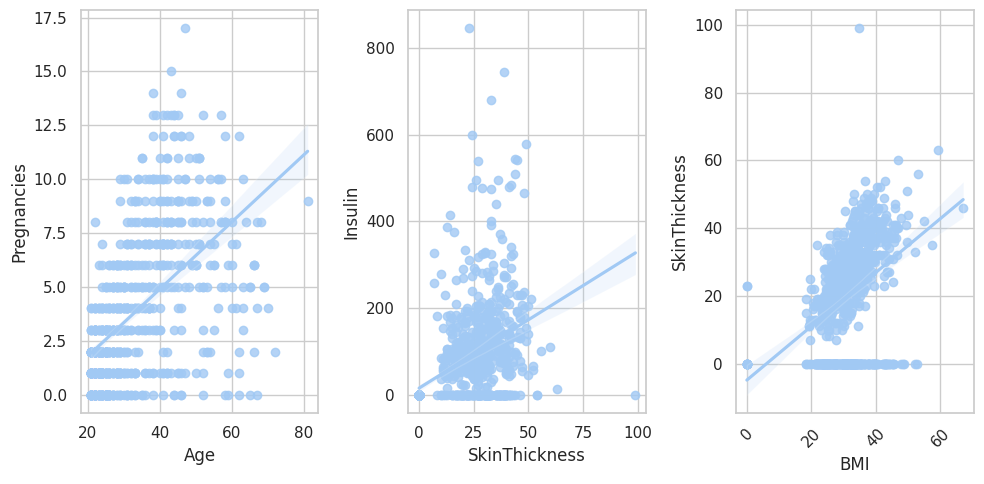

In [271]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 3)
sns.regplot(ax = axis[0], data = total_data, x = "Age", y = "Pregnancies")
sns.regplot(ax = axis[1], data = total_data, x = "SkinThickness", y = "Insulin")
sns.regplot(ax = axis[2], data = total_data, x = "BMI", y = "SkinThickness")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En el presente caso hemos vuelto a realizar, aunque sin mapa de calor con correlaciones, unos gráficos de dispersión con línea de regresión, en este caso para observar mejor algunos de los valores expuestos anteriormente en el mapa de correlaciones:

- Age y Pregnancies: clara línea positiva. Mayoría de embarazos antes de los 30 pero hasta los 40 están la mayoría de casos. Muchos casos posteriores a los 40 años, no habitual. 
- SkinThickness y Insulin: línea positiva. Nube de puntos, a más insulina, más dispersa. Mayoría de puntos hasta el valor 200. 
- BMI y SkinThickness: clara línea positiva. Cúmulo de nubes entre los valores 10 y 50 y entre BMI de 20 y 40.


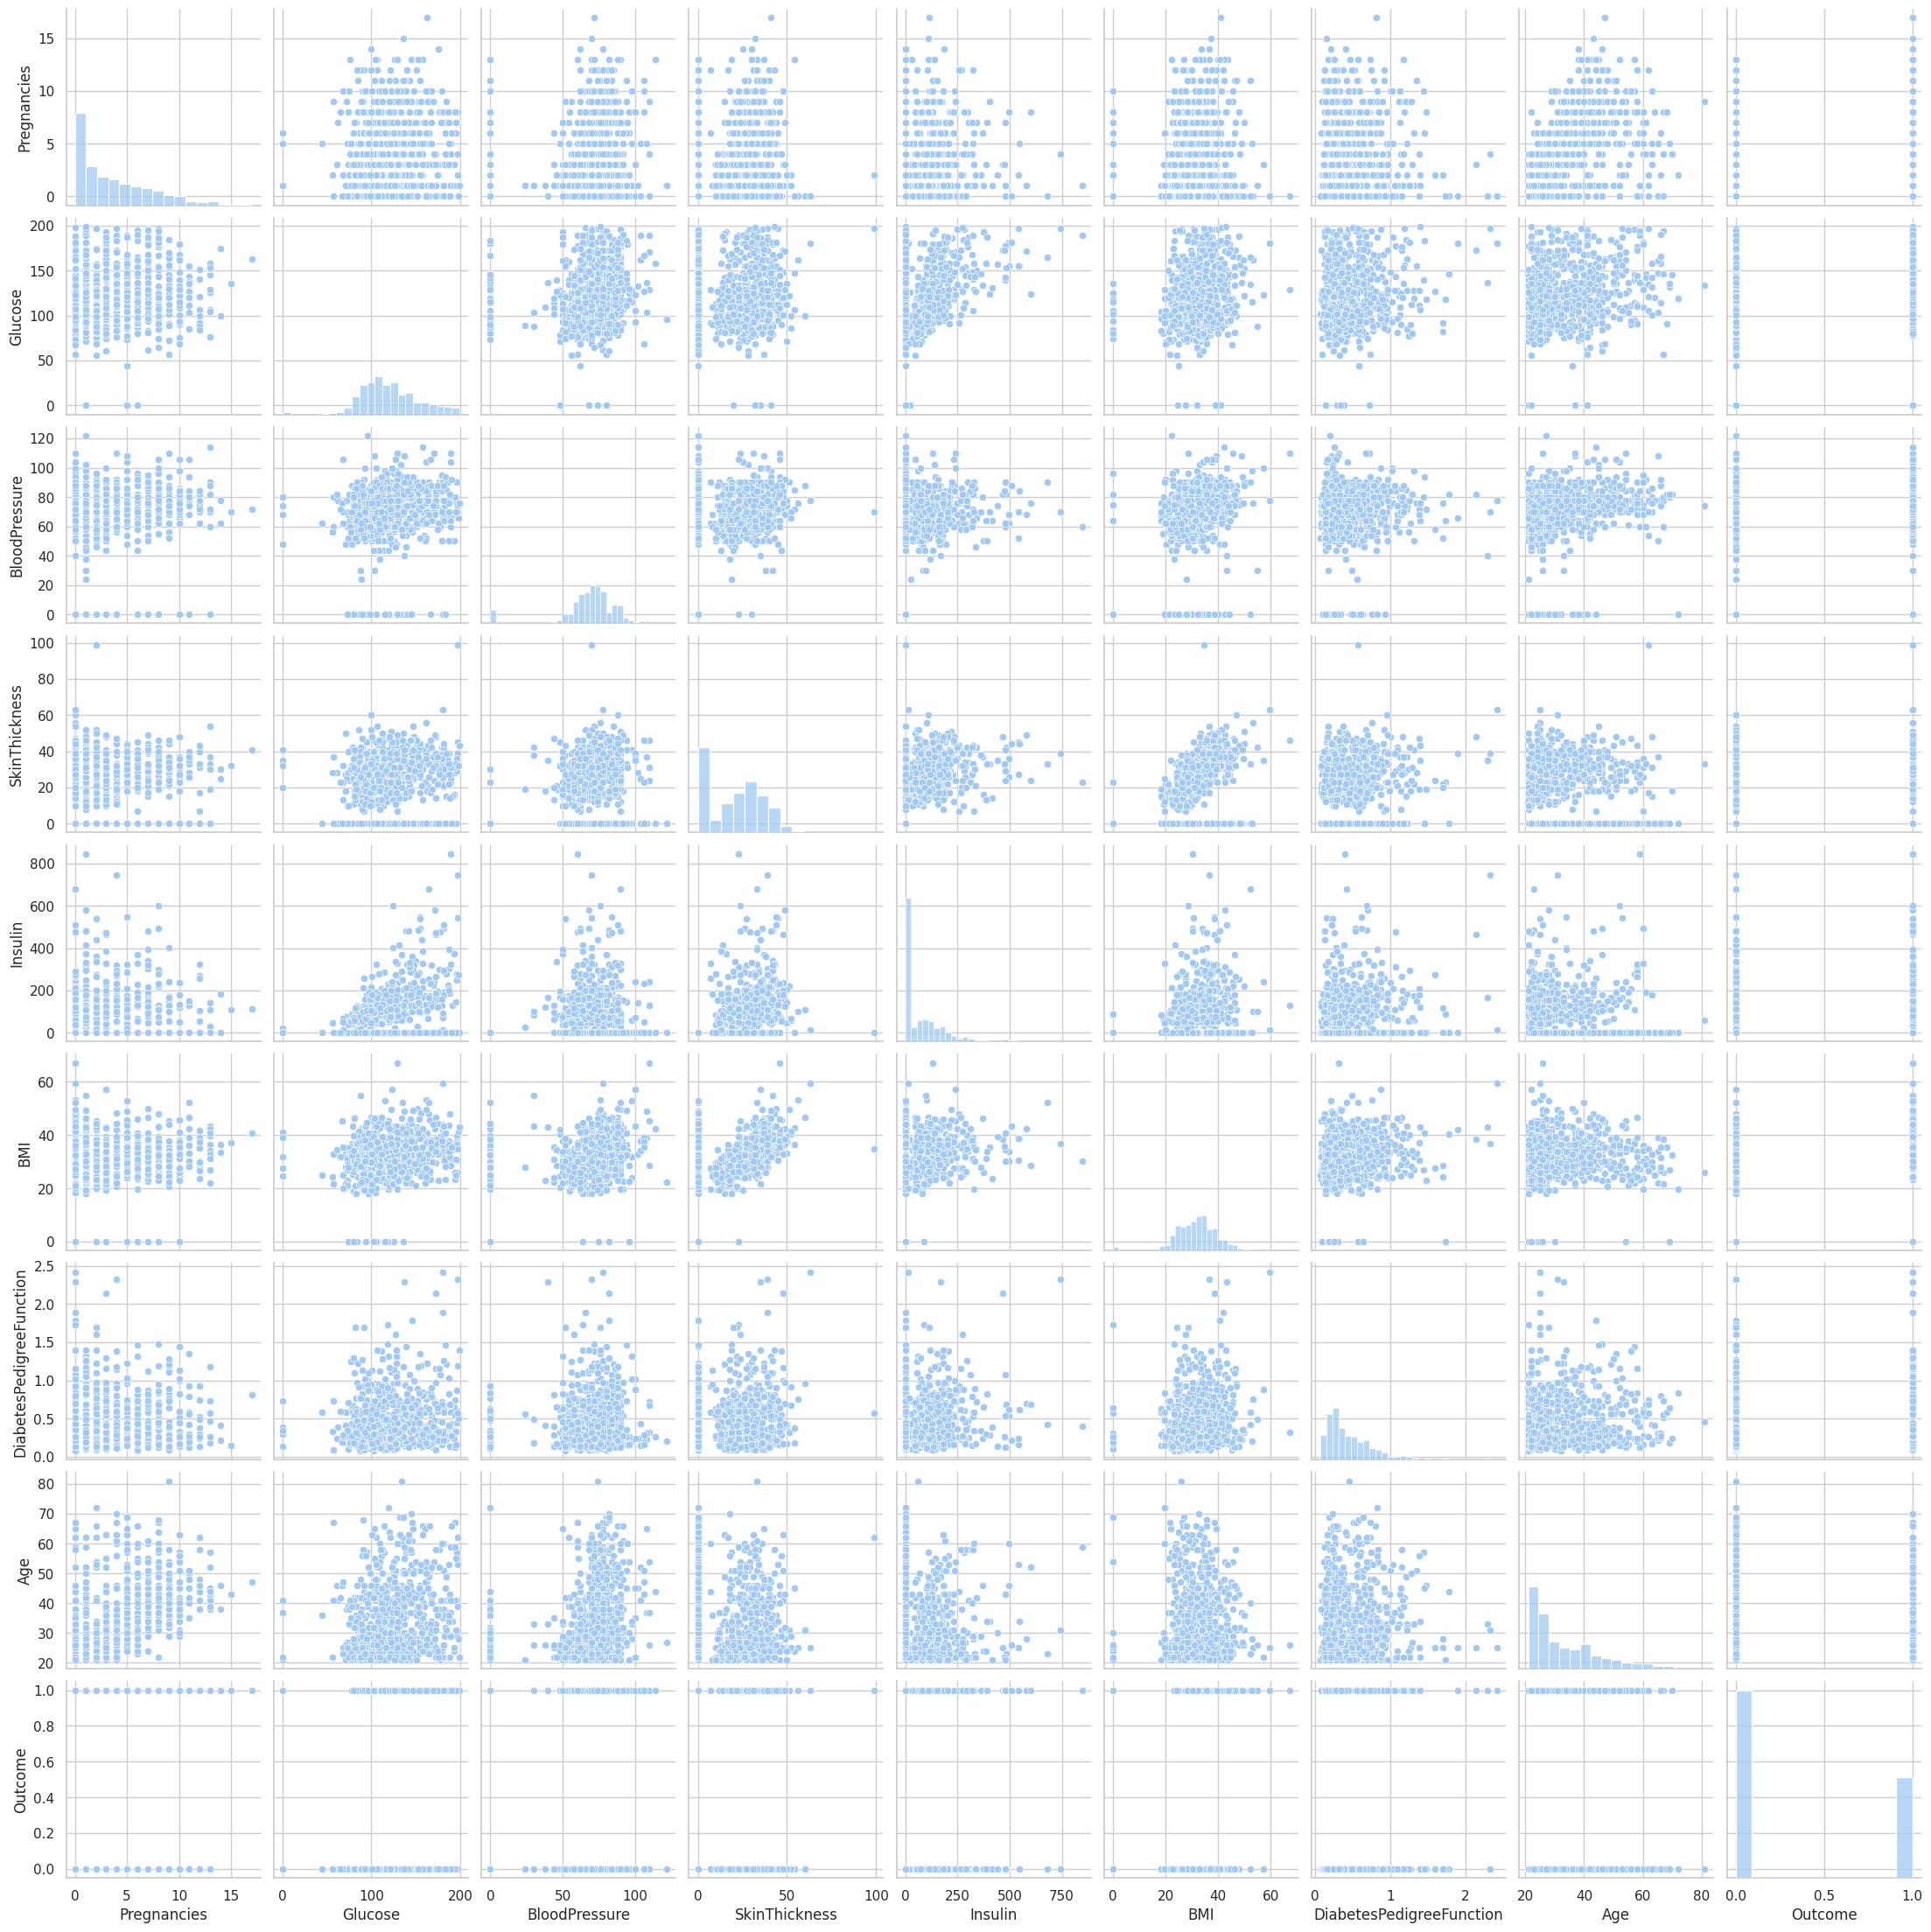

In [272]:
sns.pairplot(data = total_data)

In [273]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


En el .describe() anterior podemos observar todos los parámetros estadísticos básicos numéricos del dataset.

### 6. OUTLIERS (VALORES ATÍPICOS)

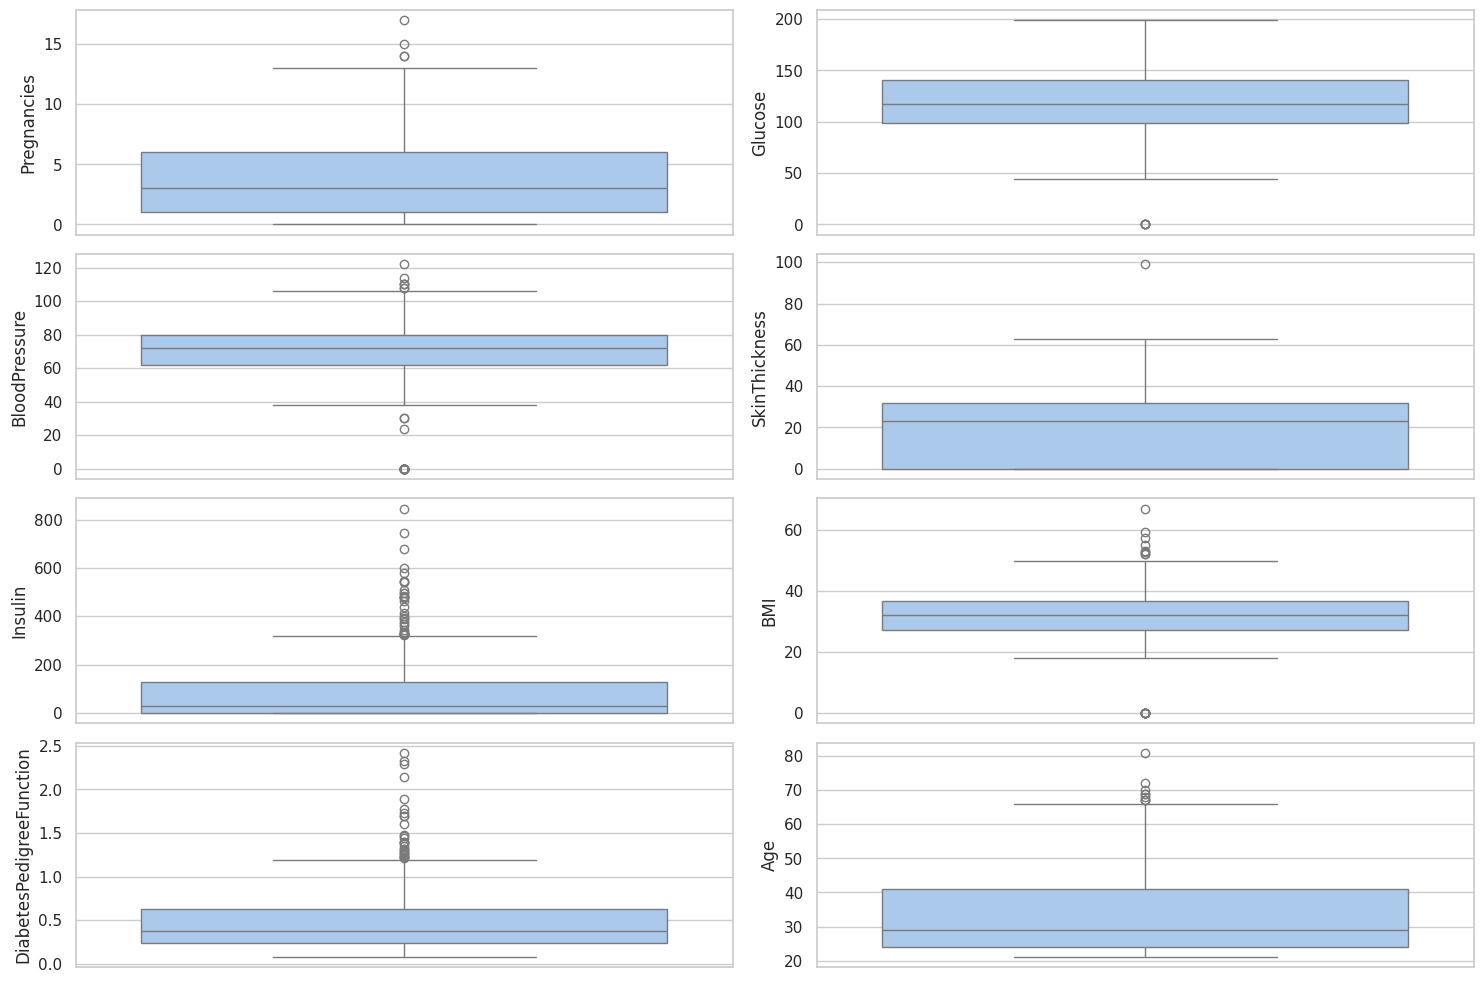

In [274]:

fig, axis = plt.subplots(4, 2, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "Pregnancies")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "Glucose")
sns.boxplot(ax = axis[1,0], data = total_data, y = "BloodPressure")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "SkinThickness")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "Insulin")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "BMI")
sns.boxplot(ax = axis[3,0], data = total_data, y = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[3, 1], data = total_data, y = "Age")


plt.tight_layout()

plt.show()

En este caso hemos analizado 8 diagramas de caja y bigotes, los mismos que hemos observamos en el análisis univariante previamente.

In [275]:
numerical_columns = [
  "Pregnancies",  
  "Glucose", 
  "BloodPressure", 
  "SkinThickness", 
  "Insulin",  
  "BMI", 
  "DiabetesPedigreeFunction", 
  "Age", 
  "Outcome"
  ]

for column in numerical_columns:
  stats = total_data[column].describe()
  iqr = stats["75%"] - stats["25%"]
  upper_limit = stats["75%"] + 1.5 * iqr
  lower_limit = stats["75%"] - 1.5 * iqr
  if lower_limit < 0:
    lower_limit = 0
    print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 13.5 y 0, con un rango intercuartílico de 5.0
Los límites superior e inferior para la búsqueda de outliers son 80.0 y 0, con un rango intercuartílico de 32.0
Los límites superior e inferior para la búsqueda de outliers son 318.12 y 0, con un rango intercuartílico de 127.25
Los límites superior e inferior para la búsqueda de outliers son 2.5 y 0, con un rango intercuartílico de 1.0


En este caso hemos calculado iqr y creado una función para calcular upper y lower limit. En caso de que el lower sea menor a 0, se pondra el menor valor de lower limit.

In [276]:
total_data_CON_outliers = total_data.copy()

total_data_SIN_outliers = total_data.copy()

def replace_outliers_from_column(column, total_data):
  column_stats = total_data[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(total_data[column])
  total_data[column] = total_data[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  total_data[column] = total_data[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return total_data.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ["Insulin", "SkinThickness"]:
  total_data_SIN_outliers, limit_list = replace_outliers_from_column(column, total_data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'Insulin': [0, np.float64(318.125)], 'SkinThickness': [0, np.float64(80.0)]}

Con la función precedente creamos un diccionario que usará la variante SIN OUTLIERS para aplicar la función anterior a las columnas "Insulin" y "SkinThickness".

In [277]:
total_data_CON_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.17,63,0
764,2,122,70,27,0,36.8,0.34,27,0
765,5,121,72,23,112,26.2,0.24,30,0
766,1,126,60,0,0,30.1,0.35,47,1


In [278]:
total_data_SIN_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0.0,33.6,0.63,50,1
1,1,85,66,29.0,0.0,26.6,0.35,31,0
2,8,183,64,0.0,0.0,23.3,0.67,32,1
3,1,89,66,23.0,94.0,28.1,0.17,21,0
4,0,137,40,35.0,168.0,43.1,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.17,63,0
764,2,122,70,27.0,0.0,36.8,0.34,27,0
765,5,121,72,23.0,112.0,26.2,0.24,30,0
766,1,126,60,0.0,0.0,30.1,0.35,47,1


Observamos que los dataset con y sin outliers tienen la misma medida.

In [279]:
total_data_CON_outliers.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [280]:
total_data_SIN_outliers.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [281]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

Al no existir nulos en el dataset no deberemos eliminarlos ni limitarlos/modificarlos.

### 7. FEATURE ENGINEERING: "ESCALADO Y NORMALIZACIÓN DE VALORES"

In [282]:
from sklearn.model_selection import train_test_split

num_variables = [
  "Pregnancies",  
  "Glucose", 
  "BloodPressure", 
  "SkinThickness", 
  "Insulin",  
  "BMI", 
  "DiabetesPedigreeFunction", 
  "Age", 
  ]


X_CON = total_data_CON_outliers.drop("Outcome", axis = 1)[num_variables]
y = total_data_CON_outliers["Outcome"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 42)

X_SIN = total_data_SIN_outliers.drop("Outcome", axis = 1)[num_variables]
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.30,21
618,9,112,82,24,0,28.2,1.28,50
346,1,139,46,19,83,28.7,0.65,22
294,0,161,50,0,0,21.9,0.25,65
231,6,134,80,37,370,46.2,0.24,46


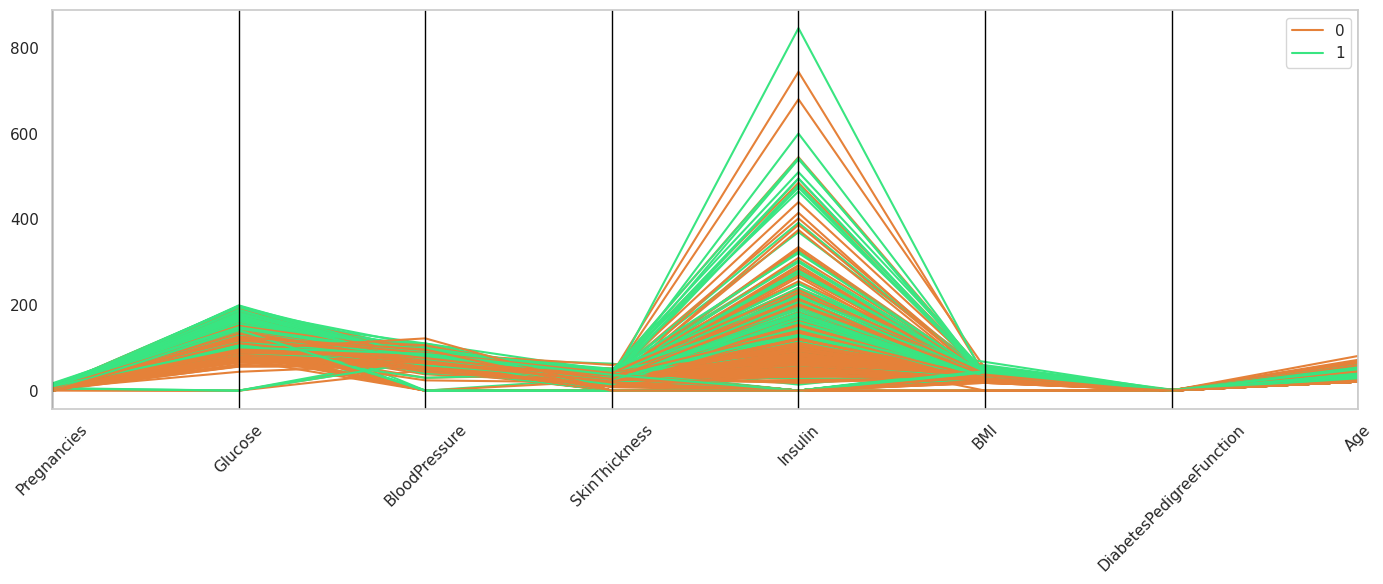

In [283]:
plt.figure(figsize=(14, 6))

columns = [
    "Pregnancies",  
    "Glucose", 
    "BloodPressure", 
    "SkinThickness", 
    "Insulin",  
    "BMI", 
    "DiabetesPedigreeFunction", 
    "Age"
]

total_data = pd.DataFrame(X_train_con_outliers, columns=columns)

total_data["Outcome"] = y_train

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

Hemos generado un gráfico de coordenadas paralelas, en este caso lo más llamativo es cómo afecta la inulina al outcome, así como la glucosa y BMI más altos, o más bajos.

7.1 NORMALIZACIÓN:

In [284]:
from sklearn.preprocessing import StandardScaler
import pickle

num_variables = [  "Pregnancies",
  "Glucose",
  "BloodPressure",
  "SkinThickness",
  "Insulin",
  "BMI",
  "DiabetesPedigreeFunction",
  "Age",
  ]
  
X_CON = total_data_CON_outliers.drop("Outcome", axis = 1)[num_variables]
y = total_data_CON_outliers["Outcome"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 42)

X_SIN = total_data_SIN_outliers.drop("Outcome", axis = 1)[num_variables]
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.30,21
618,9,112,82,24,0,28.2,1.28,50
346,1,139,46,19,83,28.7,0.65,22
294,0,161,50,0,0,21.9,0.25,65
231,6,134,80,37,370,46.2,0.24,46


In [285]:
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)
X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)

X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)
X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)
X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)
X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.53,-1.15,-3.75,-1.32,-0.70,-4.14,-0.49,-1.04
618,1.59,-0.28,0.68,0.23,-0.70,-0.49,2.42,1.49
346,-0.83,0.57,-1.27,-0.09,0.01,-0.42,0.55,-0.95
294,-1.13,1.25,-1.05,-1.32,-0.70,-1.30,-0.64,2.79
231,0.68,0.41,0.57,1.08,2.48,1.84,-0.69,1.14


7.2 ESCALADO MÍN-MAX:

In [286]:
from sklearn.preprocessing import MinMaxScaler

scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_scal.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,0.12,0.42,0.00,0.00,0.00,0.00,0.10,0.00
618,0.53,0.56,0.67,0.38,0.00,0.42,0.51,0.48
346,0.06,0.70,0.38,0.30,0.10,0.43,0.25,0.02
294,0.00,0.81,0.41,0.00,0.00,0.33,0.08,0.73
231,0.35,0.67,0.66,0.59,0.44,0.69,0.07,0.42


Pese a que el modelo de árbol de decisión no requiere normalizar/escalar datos, hemos decidido hacerlo para comprobar que efectivamente dicha posible modificación de los datos no pueda llevarnos a obtener un modelo con más accuracy.

In [287]:
from sklearn.feature_selection import f_classif, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

def best_k(x_train, y_train):
    scores = []    
    
    for k in range(1, x_train.shape[1] + 1):
        selector = SelectKBest(score_func=f_regression, k=k)
        X_new = selector.fit_transform(x_train, y_train)
        # Modelo simple para comparar (usa el que prefieras)
        model = LinearRegression()
        cv_score = cross_val_score(model, X_new, y_train, cv=5, scoring='r2').mean()
        scores.append(cv_score)
    # Mostrar el k con mejor score
    best_k = np.argmax(scores) + 1
    return best_k
k = best_k(X_train_sin_outliers_scal, y_train)
print (k)

selection_model = SelectKBest(f_classif, k = k)
selection_model.fit(X_train_con_outliers, y_train)
ix = selection_model.get_support()
X_train_con_outliers_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers), columns = X_train_con_outliers.columns.values[ix])
X_test_con_outliers_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers), columns = X_test_con_outliers.columns.values[ix])

X_train_con_outliers_sel.head()

7


,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.0,0.0,0.30,21.0
1,9.0,112.0,82.0,0.0,28.2,1.28,50.0
2,1.0,139.0,46.0,83.0,28.7,0.65,22.0
3,0.0,161.0,50.0,0.0,21.9,0.25,65.0
4,6.0,134.0,80.0,370.0,46.2,0.24,46.0


En este caso observamos como de 8 variables (sin la target), la función ha decidido quedarse con 7, eliminando la SkinThickness del dataset CON OUTLIERS.

In [288]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 4)
selection_model.fit(X_train_sin_outliers, y_train)
ix = selection_model.get_support()
X_train_sin_outliers_sel = pd.DataFrame(selection_model.transform(X_train_sin_outliers), columns = X_train_sin_outliers.columns.values[ix])
X_test_sin_outliers_sel = pd.DataFrame(selection_model.transform(X_test_sin_outliers), columns = X_test_sin_outliers.columns.values[ix])
X_train_sin_outliers_sel.head()

,Pregnancies,Glucose,BMI,Age
0,2.0,84.0,0.0,21.0
1,9.0,112.0,28.2,50.0
2,1.0,139.0,28.7,22.0
3,0.0,161.0,21.9,65.0
4,6.0,134.0,46.2,46.0


En el caso del dataset SIN OUTLIERS, la misma función ha decidido quedarse únicamente con 4 predictoras:

- Ha eliminado SkinThickness, BloodPresure, Insulin y DiabetesPedigreeFunction, incluso ha eliminado Glucose, que pensamos que era muy relevante en esta decisión.

- Se ha quedado pues: Pregnancies, Glucose, BMI y Age.

In [289]:
X_train_con_outliers_norm_sel = X_train_con_outliers_norm[X_train_con_outliers_sel.columns]
X_train_sin_outliers_norm_sel = X_train_sin_outliers_norm[X_train_sin_outliers_sel.columns]
X_test_con_outliers_norm_sel = X_test_con_outliers_norm[X_test_con_outliers_sel.columns]
X_test_sin_outliers_norm_sel = X_test_sin_outliers_norm[X_test_sin_outliers_sel.columns]

In [290]:
selection_model.fit(X_train_sin_outliers, y_train)

ix = selection_model.get_support()
X_train_sin_outliers_sel = pd.DataFrame(selection_model.transform(X_train_sin_outliers), columns = X_train_sin_outliers.columns.values[ix])
X_test_sin_outliers_sel = pd.DataFrame(selection_model.transform(X_test_sin_outliers), columns = X_test_sin_outliers.columns.values[ix])

X_train_sin_outliers_sel.head()

,Pregnancies,Glucose,BMI,Age
0,2.0,84.0,0.0,21.0
1,9.0,112.0,28.2,50.0
2,1.0,139.0,28.7,22.0
3,0.0,161.0,21.9,65.0
4,6.0,134.0,46.2,46.0


Aquí entrenamos el modelo sin outliers con las 4 columnas seleccionadas previamente.

In [291]:
X_train_con_outliers.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_train_sin_outliers.xlsx", index = False)
X_train_con_outliers_norm.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_train_sin_outliers_norm.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_train_con_outliers_scal.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_train_sin_outliers_scal.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_train_sin_outliers_scal.xlsx", index = False)
X_test_con_outliers.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_test_sin_outliers.xlsx", index = False)
X_test_con_outliers_norm.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_test_con_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_test_sin_outliers_norm.xlsx", index = False)
X_test_con_outliers_scal.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_test_con_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_test_sin_outliers_scal.xlsx", index = False)

y_train.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/y_train.xlsx", index = False)
y_test.to_excel("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/y_test.xlsx", index = False)

with open("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

with open("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

with open("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

with open("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)


X_train_con_outliers_norm_sel.to_csv("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_train_con_outliers_norm_sel.csv", index=False)
X_train_sin_outliers_norm_sel.to_csv("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_train_sin_outliers_norm_sel.csv", index=False)
X_test_con_outliers_norm_sel.to_csv("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_test_con_outliers_norm_sel.csv", index=False)
X_test_sin_outliers_norm_sel.to_csv("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_test_sin_outliers_norm_sel.csv", index=False)

X_train_con_outliers_scal_sel = X_train_con_outliers_scal[X_train_con_outliers_sel.columns]
X_train_sin_outliers_scal_sel = X_train_sin_outliers_scal[X_train_sin_outliers_sel.columns]
X_test_con_outliers_scal_sel = X_test_con_outliers_scal[X_test_con_outliers_sel.columns]
X_test_sin_outliers_scal_sel = X_test_sin_outliers_scal[X_test_sin_outliers_sel.columns]

X_train_con_outliers_scal_sel.to_csv("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_train_con_outliers_scal_sel.csv", index=False)
X_train_sin_outliers_scal_sel.to_csv("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_train_sin_outliers_scal_sel.csv", index=False)
X_test_con_outliers_scal_sel.to_csv("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_test_con_outliers_scal_sel.csv", index=False)
X_test_sin_outliers_scal_sel.to_csv("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/data/processed/X_test_sin_outliers_scal_sel.csv", index=False)

Guardamos todas las variables creadas que se usaran para el entrenamiento y test del modelo.

### 8. MODELO DE ÁRBOL DE DECISIÓN

In [292]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

mse_results = []

for dataset in [
    X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal,
    X_train_con_outliers_sel,
    X_train_sin_outliers_sel,
    X_train_con_outliers_norm_sel,
    X_train_sin_outliers_norm_sel,
    X_train_con_outliers_scal_sel,
    X_train_sin_outliers_scal_sel,
]:
    model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion="entropy",
    max_features=None,
    random_state=42
)
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    mse = mean_squared_error(y_train, y_pred)
    mse_results.append(mse)
    
print("MSE:", mse_results)
print("Menor MSE:", min(mse_results))

MSE: [0.18729641693811075, 0.18729641693811075, 0.18729641693811075, 0.18729641693811075, 0.18729641693811075, 0.18729641693811075, 0.19055374592833876, 0.18566775244299674, 0.19055374592833876, 0.18566775244299674, 0.19055374592833876, 0.18566775244299674]
Menor MSE: 0.18566775244299674


En este caso, si bien se ha hecho pruebas sólo con semilla y sin ningún hiperparámetro más, no daba datos correctos por overfitting y se ha decidido aplicar:

    model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion="entropy",
    max_features=None,
    random_state=42
)

- Max Depth: limitando la profundidad del árbol a 5
- Min samples split: Nodo deberá tener mínimo 10 muestras para dividirse
- Min samples leaf: Lo mismo para las hojas
- Criterion: entre Gini y Entropy hemos elegido Entropy, para mejor pureza e información de los nodos
- Max features: todas las variables se usarán, por eso "None"
- Random state: fijamos semilla a 42 para obtener siempre mismo resultado

En cuanto al error cuadrático más bajo, coincide con 3 de las variables:

X_train_sin_outliers_sel

X_train_sin_outliers_norm_sel

X_train_sin_outliers_scal_sel

Es decir, tenemos claro que el modelo ha funcionado mejor sin outliers y con la selección de best k (4 columnas que ha decidido dejar).

In [293]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

accuracy_results = []

for dataset in [
    X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal,
    X_train_con_outliers_sel,
    X_train_sin_outliers_sel,
    X_train_con_outliers_norm_sel,
    X_train_sin_outliers_norm_sel,
    X_train_con_outliers_scal_sel,
    X_train_sin_outliers_scal_sel,
]:
    model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion="entropy",
    max_features=None,
    random_state=42
)
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    accuracy = accuracy_score(y_train, y_pred)
    accuracy_results.append(accuracy_score(y_train, y_pred))

print("Accuracy:", accuracy_results)
print("Mejor Accuracy:", max(accuracy_results))

Accuracy: [0.8127035830618893, 0.8127035830618893, 0.8127035830618893, 0.8127035830618893, 0.8127035830618893, 0.8127035830618893, 0.8094462540716613, 0.8143322475570033, 0.8094462540716613, 0.8143322475570033, 0.8094462540716613, 0.8143322475570033]
Mejor Accuracy: 0.8143322475570033


En este caso, observamos que lo mismo que hemos observado con el MSE ocurre en el accuracy, es decir, todas las variables SIN outliers y con las 4 variables seleccionadas con la función que hemos creado, dan mejor accuracy.

In [294]:
model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion="entropy",
    max_features=None,
    random_state=42
)
model.fit(X_train_sin_outliers_sel, y_train)
y_pred_test = model.predict(X_test_sin_outliers_sel)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy en test:", accuracy)


Accuracy en test: 0.7272727272727273


Para predecir el modelo, se ha elegido la variable X_train_sin_outliers_sel, que da un accuracy de 0.72, menor al accuracy en train.

In [295]:
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"El MSE en test es {mse_test}")


El MSE en test es 0.2727272727272727


En este caso, esa misma variable da un MSE de 0.27.

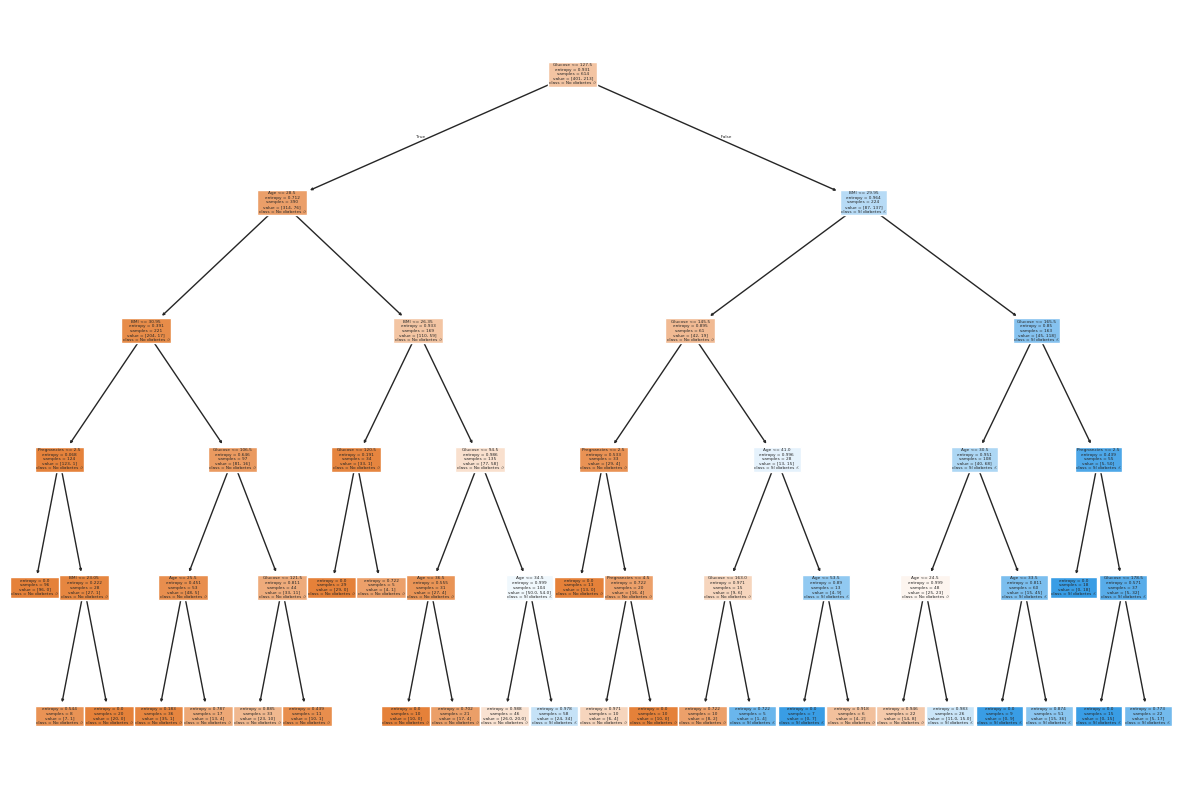

In [296]:
from sklearn import tree

fig = plt.figure(figsize=(15, 10))  

tree.plot_tree(
    model,
    feature_names=list(X_train_sin_outliers_sel.columns),
    class_names=["No diabetes :)", "Sí diabetes :("],
    filled=True,
    max_depth=None  #Se ha hecho prueba sin estas características y no se podía visualizar el gráfico correctamente, por eso he elegido max_depth para la visualización
)

plt.show()

In [297]:
plt.savefig("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/models/arbol_decision.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

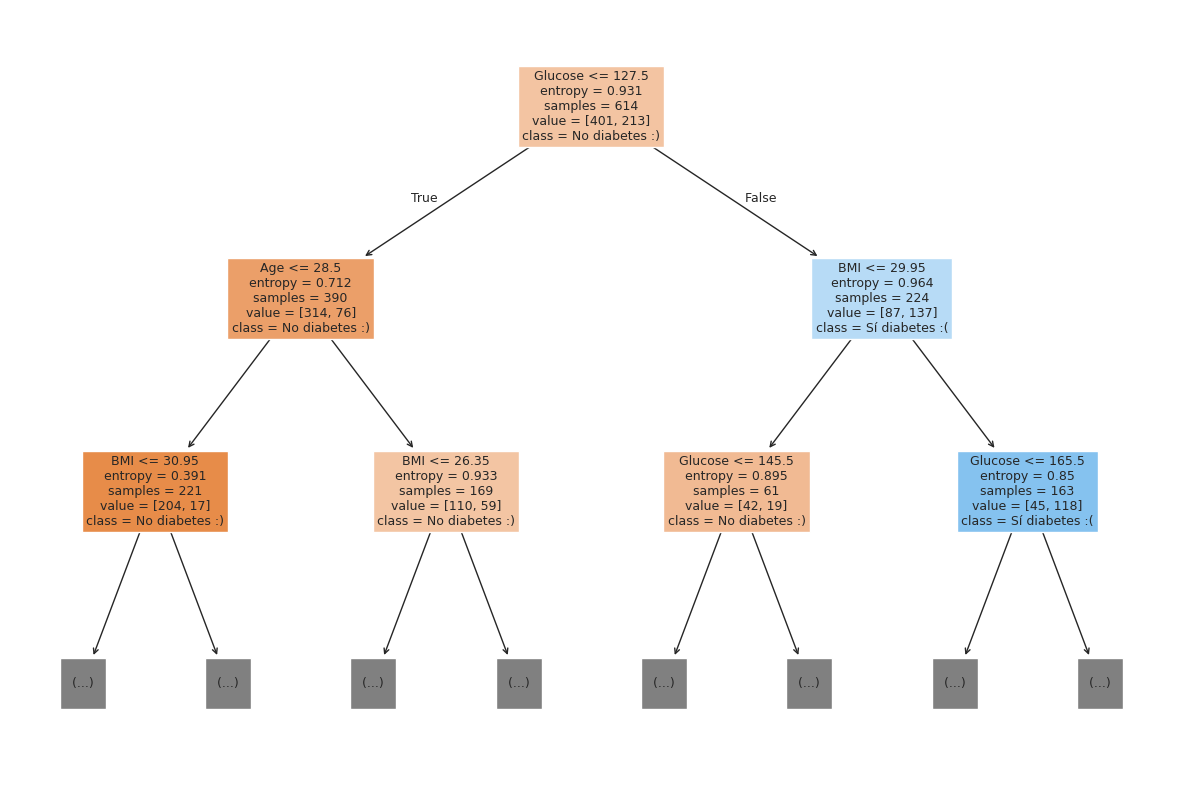

In [298]:
from sklearn import tree

fig = plt.figure(figsize=(15, 10))  

tree.plot_tree(
    model,
    feature_names=list(X_train_sin_outliers_sel.columns),
    class_names=["No diabetes :)", "Sí diabetes :("],
    filled=True,
    max_depth=2  #Prueba con todas las características
)

plt.show()



In [299]:
plt.savefig("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/models/arbol_decision_max_depth_2.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

Visualizamos el árbol incluyendo max depth de 2 porque sino no era visible en Codespace, y guardamos imagen del árbol completo en png.

In [300]:
from pickle import dump

dump(model, open("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/models/decision_tree_classifier_default_42.sav", "wb"))


Guardamos como pickle el modelo entrenado para usarlo o llevarlo a producción sin tener que volver a entrenarlo.

### 9. MODELO DE RANDOM FOREST

In [301]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

accuracy_results = []

for dataset in [
    X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal,
    X_train_con_outliers_sel,
    X_train_sin_outliers_sel,
    X_train_con_outliers_norm_sel,
    X_train_sin_outliers_norm_sel,
    X_train_con_outliers_scal_sel,
    X_train_sin_outliers_scal_sel,
]:
    model = RandomForestClassifier(
    n_estimators=10, 
    criterion='gini', 
    max_depth=3, 
    min_samples_split=5, 
    min_samples_leaf=5, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    n_jobs=9, 
    random_state=42,
)
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    accuracy = accuracy_score(y_train, y_pred)
    accuracy_results.append(accuracy_score(y_train, y_pred))

print("Accuracy:", accuracy_results)
print("Mejor Accuracy:", max(accuracy_results))

Accuracy: [0.7850162866449512, 0.7850162866449512, 0.7850162866449512, 0.7850162866449512, 0.7850162866449512, 0.7850162866449512, 0.7817589576547231, 0.7817589576547231, 0.7817589576547231, 0.7817589576547231, 0.7817589576547231, 0.7817589576547231]
Mejor Accuracy: 0.7850162866449512


Observamos pues que el mejor accuracy es 0.7850162866449512 lo comparten las variables: 

1	X_train_con_outliers	0.7850162866449512 ✅
2	X_train_sin_outliers	0.7850162866449512 ✅
3	X_train_con_outliers_norm	0.7850162866449512 ✅
4	X_train_sin_outliers_norm	0.7850162866449512 ✅
5	X_train_con_outliers_scal	0.7850162866449512 ✅
6	X_train_sin_outliers_scal	0.7850162866449512 ✅

En este caso como no hace falta normalizar ni escalar, sino que se ha hecho para comprobar que no afectaba al accuracy, se ha decidido quedarnos con el dataset sin outliers y y con outliers para los pasos siguientes. 

In [302]:
model = RandomForestClassifier(
    n_estimators=10, 
    criterion='gini', 
    max_depth=3, 
    min_samples_split=5, 
    min_samples_leaf=5, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    n_jobs=8, 
    random_state=42,
)
model.fit(X_train_con_outliers, y_train)
y_pred_test = model.predict(X_test_con_outliers)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy en test:", accuracy)

Accuracy en test: 0.7792207792207793


Finalmente el accuracy en test del Random Forest es de 0.77 con la variable X_train_con_outliers, superior al del árbol de decisión, que era 0.72. Por lo tanto concluimos que, efectivamente, el modelo de Random Forest es mejor que el de árbol de decisión en nuestro caso.

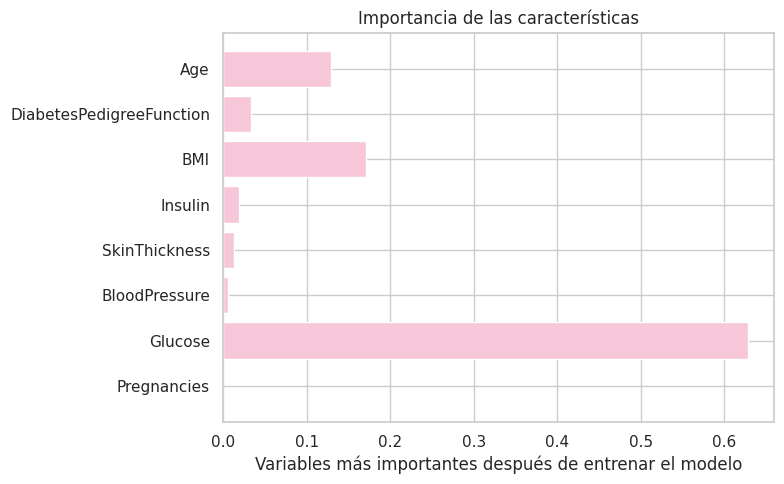

In [303]:
#Visualizacion mejores variables

importances = model.feature_importances_
features = X_train_con_outliers.columns

# Visualizarlas
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color="#f7c6d9")
plt.xlabel("Variables más importantes después de entrenar el modelo")
plt.title("Importancia de las características")
plt.tight_layout()
plt.show()

En este momento hemos querido observar las variables más importantes del modelo tras su entrenamiento, para ello hemos usado el método feature_importances_ de la librería sklearn.

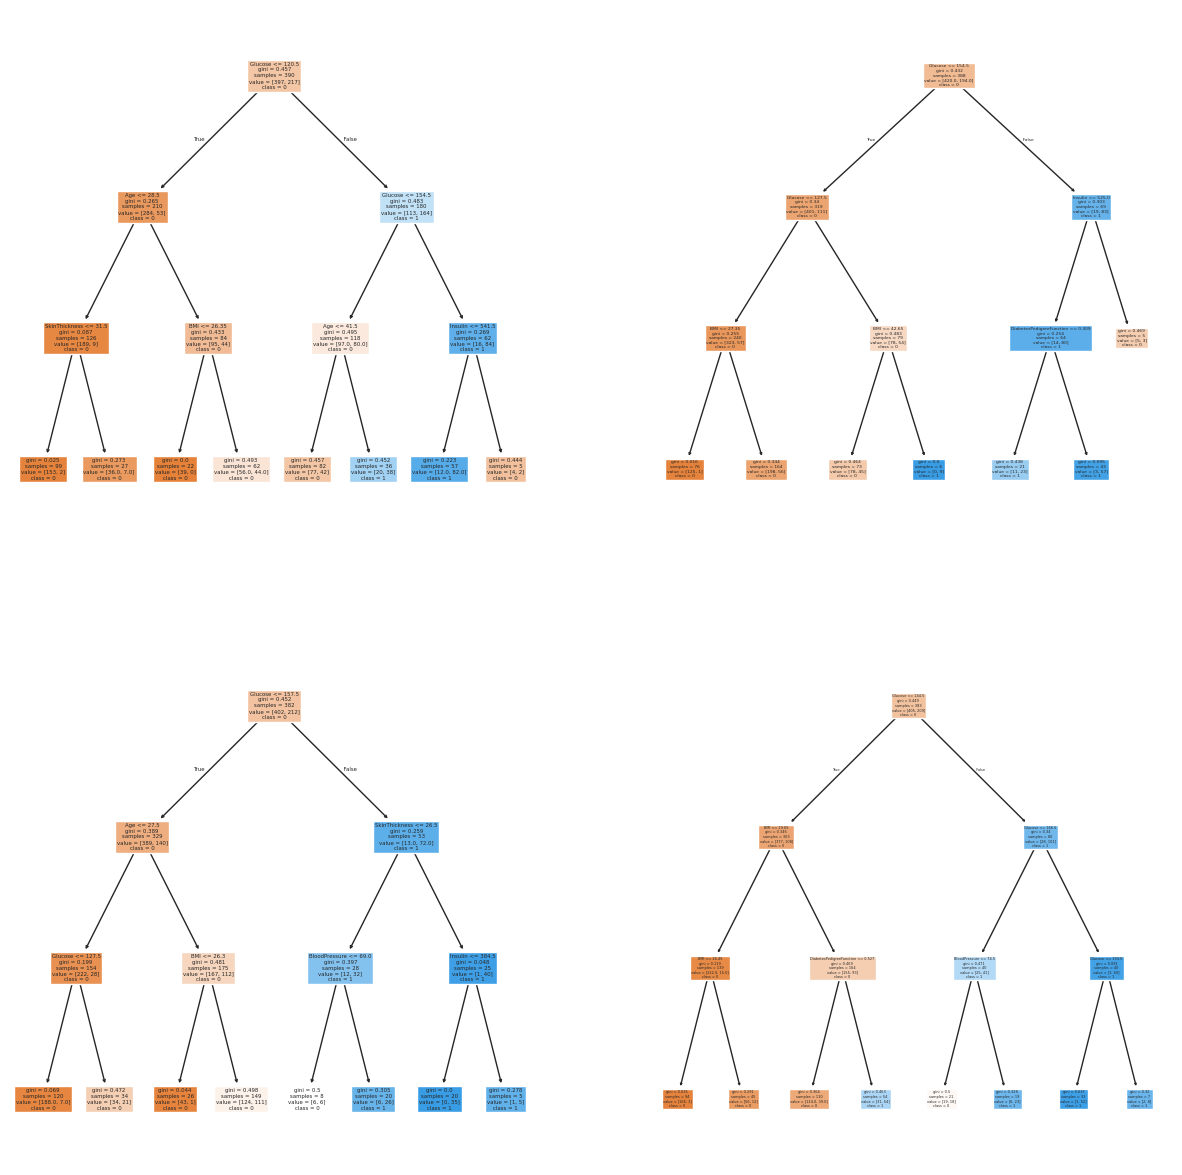

In [307]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train_con_outliers.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train_con_outliers.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train_con_outliers.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train_con_outliers.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()



In [ ]:
from pickle import dump

dump(model, open("/workspaces/ginappedrosa-decision-tree-ML-diabetes_case/models/random_forest_classifier_default_42.sav", "wb"))

Finalmente guardamos el modelo de Random Forest, que hemos entrenado con las mismas variables que el árbol de decisión, es decir, las 4 seleccionadas sin outliers.